In [1]:
import pandas as pd
import numpy as np
import random as rd
from numpy import nan
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/mercadeo_bancario.csv")
df_bank.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
le =preprocessing.LabelEncoder()
df_bank['credito_sin_pago']=le.fit_transform(df_bank['credito_sin_pago'])
le2 =preprocessing.LabelEncoder()
df_bank['educacion']=le2.fit_transform(df_bank['educacion'])
le3 =preprocessing.LabelEncoder()
df_bank['prestamo_personal']=le3.fit_transform(df_bank['prestamo_personal'])
le4 =preprocessing.LabelEncoder()
df_bank['prestamo_vivienda']=le4.fit_transform(df_bank['prestamo_vivienda'])
df_bank['credito_sin_pago'] = df_bank['credito_sin_pago'].replace(1, 2)
df_bank.head(20)

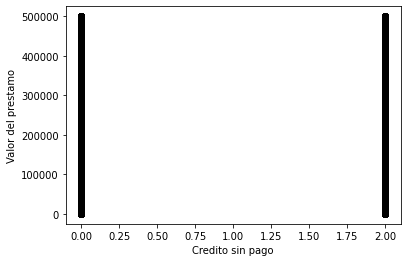

In [5]:
X = df_bank[["valor_prestamo","credito_sin_pago"]]
plt.scatter(X["credito_sin_pago"],X["valor_prestamo"],c='black')
plt.xlabel('Credito sin pago')
plt.ylabel('Valor del prestamo')
plt.show()

In [4]:
df_bank.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

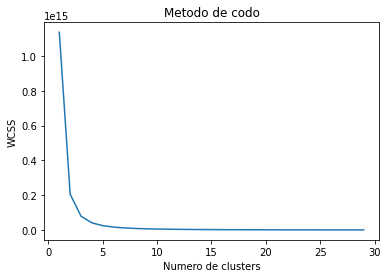

In [6]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

[287021.02635327   7029.2593922  429845.05730663 147105.29451255]


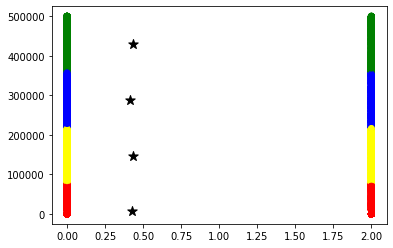

In [9]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
print(centroids[:, 0])
f1 = df_bank['credito_sin_pago'].values
f2 = df_bank['valor_prestamo'].values
plt.scatter(f1, f2, c=asignar)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()